In [1]:
# importing libaries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU, self).__init__()

        self.hidden_size = hidden_size

        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.gru(x, hidden)
        output = self.fc(output)
        return output, hidden

In [3]:
# Toy problem data
input_size = 256  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 256  
sequence_length = 160  # number of sequences/ number of rows
batch_size = 1
num_epochs = 30000

In [4]:
# Load the .mat file
v_data = scipy.io.loadmat('v.mat')
h_data = scipy.io.loadmat('h.mat')
x_data = scipy.io.loadmat('x.mat')
h_data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jul 20 15:02:48 2023',
 '__version__': '1.0',
 '__globals__': [],
 'h': array([[0.03949907, 0.03945555, 0.03968762, ..., 0.04081577, 0.04034067,
         0.03995187],
        [0.03949522, 0.03972834, 0.04007071, ..., 0.0406224 , 0.0405568 ,
         0.04021852],
        [0.03980837, 0.03966293, 0.04008707, ..., 0.04077249, 0.04050591,
         0.04019281],
        ...,
        [0.04915863, 0.04935256, 0.04961976, ..., 0.04917885, 0.04899574,
         0.04881741],
        [0.04904458, 0.04916197, 0.04943338, ..., 0.04902097, 0.04897786,
         0.04875013],
        [0.04913692, 0.04932824, 0.04941899, ..., 0.04888785, 0.0488357 ,
         0.04855312]])}

In [5]:
x = x_data['X']
u = h_data['h']

In [6]:
# Set random seed for reproducibility
torch.manual_seed(50)

In [7]:
input_data = u[0:160,:]
target_data = u[1:161, :]

test_data = u[160, :]
#test_target = u[161:201, :]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (256,)
input data shape (160, 256)
Target data shape (160, 256)


In [8]:
# Convert data to tensors
input_tensor = torch.tensor(input_data).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 160, 256])
Target tensor shape torch.Size([1, 160, 256])


In [9]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target).view(batch_size, 40, output_size).float()


In [10]:
# Create GRU instance
gru = GRU(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state
    hidden = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, hidden = gru(input_tensor, hidden)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')



Epoch: 10/30000, Loss: 0.10032392
Epoch: 20/30000, Loss: 0.05626938
Epoch: 30/30000, Loss: 0.03072028
Epoch: 40/30000, Loss: 0.02170625
Epoch: 50/30000, Loss: 0.01283358
Epoch: 60/30000, Loss: 0.00681270
Epoch: 70/30000, Loss: 0.00357107
Epoch: 80/30000, Loss: 0.00191044
Epoch: 90/30000, Loss: 0.00125750
Epoch: 100/30000, Loss: 0.00100009
Epoch: 110/30000, Loss: 0.00086939
Epoch: 120/30000, Loss: 0.00079100
Epoch: 130/30000, Loss: 0.00074080
Epoch: 140/30000, Loss: 0.00070419
Epoch: 150/30000, Loss: 0.00067518
Epoch: 160/30000, Loss: 0.00065112
Epoch: 170/30000, Loss: 0.00063040
Epoch: 180/30000, Loss: 0.00061207
Epoch: 190/30000, Loss: 0.00059549
Epoch: 200/30000, Loss: 0.00058023
Epoch: 210/30000, Loss: 0.00056593
Epoch: 220/30000, Loss: 0.00055232
Epoch: 230/30000, Loss: 0.00053916
Epoch: 240/30000, Loss: 0.00052618
Epoch: 250/30000, Loss: 0.00051286
Epoch: 260/30000, Loss: 0.00049667
Epoch: 270/30000, Loss: 0.00048068
Epoch: 280/30000, Loss: 0.00046591
Epoch: 290/30000, Loss: 0.000

Epoch: 2330/30000, Loss: 0.00003347
Epoch: 2340/30000, Loss: 0.00003325
Epoch: 2350/30000, Loss: 0.00003153
Epoch: 2360/30000, Loss: 0.00003089
Epoch: 2370/30000, Loss: 0.00003076
Epoch: 2380/30000, Loss: 0.00002845
Epoch: 2390/30000, Loss: 0.00002770
Epoch: 2400/30000, Loss: 0.00003045
Epoch: 2410/30000, Loss: 0.00002863
Epoch: 2420/30000, Loss: 0.00002979
Epoch: 2430/30000, Loss: 0.00002600
Epoch: 2440/30000, Loss: 0.00002528
Epoch: 2450/30000, Loss: 0.00002324
Epoch: 2460/30000, Loss: 0.00002191
Epoch: 2470/30000, Loss: 0.00002094
Epoch: 2480/30000, Loss: 0.00002130
Epoch: 2490/30000, Loss: 0.00002054
Epoch: 2500/30000, Loss: 0.00002111
Epoch: 2510/30000, Loss: 0.00002483
Epoch: 2520/30000, Loss: 0.00002072
Epoch: 2530/30000, Loss: 0.00001986
Epoch: 2540/30000, Loss: 0.00001845
Epoch: 2550/30000, Loss: 0.00001776
Epoch: 2560/30000, Loss: 0.00001785
Epoch: 2570/30000, Loss: 0.00002091
Epoch: 2580/30000, Loss: 0.00002142
Epoch: 2590/30000, Loss: 0.00002107
Epoch: 2600/30000, Loss: 0.0

Epoch: 4610/30000, Loss: 0.00002033
Epoch: 4620/30000, Loss: 0.00002276
Epoch: 4630/30000, Loss: 0.00001533
Epoch: 4640/30000, Loss: 0.00002367
Epoch: 4650/30000, Loss: 0.00010526
Epoch: 4660/30000, Loss: 0.00003520
Epoch: 4670/30000, Loss: 0.00002297
Epoch: 4680/30000, Loss: 0.00001617
Epoch: 4690/30000, Loss: 0.00001125
Epoch: 4700/30000, Loss: 0.00001186
Epoch: 4710/30000, Loss: 0.00002876
Epoch: 4720/30000, Loss: 0.00019874
Epoch: 4730/30000, Loss: 0.00009807
Epoch: 4740/30000, Loss: 0.00007929
Epoch: 4750/30000, Loss: 0.00002955
Epoch: 4760/30000, Loss: 0.00002112
Epoch: 4770/30000, Loss: 0.00001337
Epoch: 4780/30000, Loss: 0.00001123
Epoch: 4790/30000, Loss: 0.00001010
Epoch: 4800/30000, Loss: 0.00001702
Epoch: 4810/30000, Loss: 0.00018434
Epoch: 4820/30000, Loss: 0.00007924
Epoch: 4830/30000, Loss: 0.00004371
Epoch: 4840/30000, Loss: 0.00001928
Epoch: 4850/30000, Loss: 0.00001701
Epoch: 4860/30000, Loss: 0.00001473
Epoch: 4870/30000, Loss: 0.00002163
Epoch: 4880/30000, Loss: 0.0

Epoch: 6890/30000, Loss: 0.00000836
Epoch: 6900/30000, Loss: 0.00000869
Epoch: 6910/30000, Loss: 0.00002891
Epoch: 6920/30000, Loss: 0.00030500
Epoch: 6930/30000, Loss: 0.00005538
Epoch: 6940/30000, Loss: 0.00003149
Epoch: 6950/30000, Loss: 0.00001383
Epoch: 6960/30000, Loss: 0.00000790
Epoch: 6970/30000, Loss: 0.00000652
Epoch: 6980/30000, Loss: 0.00001660
Epoch: 6990/30000, Loss: 0.00032564
Epoch: 7000/30000, Loss: 0.00015237
Epoch: 7010/30000, Loss: 0.00004080
Epoch: 7020/30000, Loss: 0.00003696
Epoch: 7030/30000, Loss: 0.00001799
Epoch: 7040/30000, Loss: 0.00001996
Epoch: 7050/30000, Loss: 0.00005056
Epoch: 7060/30000, Loss: 0.00003640
Epoch: 7070/30000, Loss: 0.00001915
Epoch: 7080/30000, Loss: 0.00000683
Epoch: 7090/30000, Loss: 0.00000935
Epoch: 7100/30000, Loss: 0.00002551
Epoch: 7110/30000, Loss: 0.00016032
Epoch: 7120/30000, Loss: 0.00009926
Epoch: 7130/30000, Loss: 0.00003413
Epoch: 7140/30000, Loss: 0.00001799
Epoch: 7150/30000, Loss: 0.00000939
Epoch: 7160/30000, Loss: 0.0

Epoch: 9170/30000, Loss: 0.00001615
Epoch: 9180/30000, Loss: 0.00001883
Epoch: 9190/30000, Loss: 0.00002331
Epoch: 9200/30000, Loss: 0.00003093
Epoch: 9210/30000, Loss: 0.00010304
Epoch: 9220/30000, Loss: 0.00008042
Epoch: 9230/30000, Loss: 0.00010410
Epoch: 9240/30000, Loss: 0.00003187
Epoch: 9250/30000, Loss: 0.00001554
Epoch: 9260/30000, Loss: 0.00001260
Epoch: 9270/30000, Loss: 0.00001993
Epoch: 9280/30000, Loss: 0.00002598
Epoch: 9290/30000, Loss: 0.00003090
Epoch: 9300/30000, Loss: 0.00005037
Epoch: 9310/30000, Loss: 0.00004601
Epoch: 9320/30000, Loss: 0.00003763
Epoch: 9330/30000, Loss: 0.00019717
Epoch: 9340/30000, Loss: 0.00003505
Epoch: 9350/30000, Loss: 0.00005136
Epoch: 9360/30000, Loss: 0.00002816
Epoch: 9370/30000, Loss: 0.00001277
Epoch: 9380/30000, Loss: 0.00001486
Epoch: 9390/30000, Loss: 0.00001771
Epoch: 9400/30000, Loss: 0.00002767
Epoch: 9410/30000, Loss: 0.00004511
Epoch: 9420/30000, Loss: 0.00030915
Epoch: 9430/30000, Loss: 0.00011110
Epoch: 9440/30000, Loss: 0.0

Epoch: 11410/30000, Loss: 0.00010785
Epoch: 11420/30000, Loss: 0.00027353
Epoch: 11430/30000, Loss: 0.00008838
Epoch: 11440/30000, Loss: 0.00003005
Epoch: 11450/30000, Loss: 0.00002256
Epoch: 11460/30000, Loss: 0.00001674
Epoch: 11470/30000, Loss: 0.00001768
Epoch: 11480/30000, Loss: 0.00006669
Epoch: 11490/30000, Loss: 0.00005408
Epoch: 11500/30000, Loss: 0.00003808
Epoch: 11510/30000, Loss: 0.00002455
Epoch: 11520/30000, Loss: 0.00001946
Epoch: 11530/30000, Loss: 0.00003229
Epoch: 11540/30000, Loss: 0.00009893
Epoch: 11550/30000, Loss: 0.00007436
Epoch: 11560/30000, Loss: 0.00001867
Epoch: 11570/30000, Loss: 0.00001792
Epoch: 11580/30000, Loss: 0.00008041
Epoch: 11590/30000, Loss: 0.00012211
Epoch: 11600/30000, Loss: 0.00004401
Epoch: 11610/30000, Loss: 0.00003685
Epoch: 11620/30000, Loss: 0.00002380
Epoch: 11630/30000, Loss: 0.00001813
Epoch: 11640/30000, Loss: 0.00001451
Epoch: 11650/30000, Loss: 0.00002062
Epoch: 11660/30000, Loss: 0.00011656
Epoch: 11670/30000, Loss: 0.00026755
E

Epoch: 13630/30000, Loss: 0.00002581
Epoch: 13640/30000, Loss: 0.00004835
Epoch: 13650/30000, Loss: 0.00005490
Epoch: 13660/30000, Loss: 0.00059775
Epoch: 13670/30000, Loss: 0.00007569
Epoch: 13680/30000, Loss: 0.00002645
Epoch: 13690/30000, Loss: 0.00002237
Epoch: 13700/30000, Loss: 0.00001543
Epoch: 13710/30000, Loss: 0.00001208
Epoch: 13720/30000, Loss: 0.00002074
Epoch: 13730/30000, Loss: 0.00008430
Epoch: 13740/30000, Loss: 0.00004986
Epoch: 13750/30000, Loss: 0.00002623
Epoch: 13760/30000, Loss: 0.00002832
Epoch: 13770/30000, Loss: 0.00003798
Epoch: 13780/30000, Loss: 0.00003931
Epoch: 13790/30000, Loss: 0.00001038
Epoch: 13800/30000, Loss: 0.00001460
Epoch: 13810/30000, Loss: 0.00002310
Epoch: 13820/30000, Loss: 0.00017093
Epoch: 13830/30000, Loss: 0.00002325
Epoch: 13840/30000, Loss: 0.00001590
Epoch: 13850/30000, Loss: 0.00001768
Epoch: 13860/30000, Loss: 0.00002375
Epoch: 13870/30000, Loss: 0.00003493
Epoch: 13880/30000, Loss: 0.00010049
Epoch: 13890/30000, Loss: 0.00003151
E

Epoch: 15850/30000, Loss: 0.00002110
Epoch: 15860/30000, Loss: 0.00001346
Epoch: 15870/30000, Loss: 0.00001344
Epoch: 15880/30000, Loss: 0.00003573
Epoch: 15890/30000, Loss: 0.00013370
Epoch: 15900/30000, Loss: 0.00005003
Epoch: 15910/30000, Loss: 0.00002330
Epoch: 15920/30000, Loss: 0.00007064
Epoch: 15930/30000, Loss: 0.00004231
Epoch: 15940/30000, Loss: 0.00006913
Epoch: 15950/30000, Loss: 0.00002168
Epoch: 15960/30000, Loss: 0.00001122
Epoch: 15970/30000, Loss: 0.00001063
Epoch: 15980/30000, Loss: 0.00001641
Epoch: 15990/30000, Loss: 0.00002630
Epoch: 16000/30000, Loss: 0.00004877
Epoch: 16010/30000, Loss: 0.00009608
Epoch: 16020/30000, Loss: 0.00005998
Epoch: 16030/30000, Loss: 0.00003602
Epoch: 16040/30000, Loss: 0.00002035
Epoch: 16050/30000, Loss: 0.00006685
Epoch: 16060/30000, Loss: 0.00010598
Epoch: 16070/30000, Loss: 0.00005135
Epoch: 16080/30000, Loss: 0.00001975
Epoch: 16090/30000, Loss: 0.00001321
Epoch: 16100/30000, Loss: 0.00001566
Epoch: 16110/30000, Loss: 0.00007045
E

Epoch: 18070/30000, Loss: 0.00006439
Epoch: 18080/30000, Loss: 0.00005658
Epoch: 18090/30000, Loss: 0.00001977
Epoch: 18100/30000, Loss: 0.00001321
Epoch: 18110/30000, Loss: 0.00005598
Epoch: 18120/30000, Loss: 0.00011396
Epoch: 18130/30000, Loss: 0.00004005
Epoch: 18140/30000, Loss: 0.00001898
Epoch: 18150/30000, Loss: 0.00005317
Epoch: 18160/30000, Loss: 0.00006465
Epoch: 18170/30000, Loss: 0.00002098
Epoch: 18180/30000, Loss: 0.00005230
Epoch: 18190/30000, Loss: 0.00007772
Epoch: 18200/30000, Loss: 0.00001844
Epoch: 18210/30000, Loss: 0.00007376
Epoch: 18220/30000, Loss: 0.00002536
Epoch: 18230/30000, Loss: 0.00003666
Epoch: 18240/30000, Loss: 0.00008525
Epoch: 18250/30000, Loss: 0.00001400
Epoch: 18260/30000, Loss: 0.00002759
Epoch: 18270/30000, Loss: 0.00009810
Epoch: 18280/30000, Loss: 0.00002700
Epoch: 18290/30000, Loss: 0.00002313
Epoch: 18300/30000, Loss: 0.00007465
Epoch: 18310/30000, Loss: 0.00008434
Epoch: 18320/30000, Loss: 0.00004088
Epoch: 18330/30000, Loss: 0.00002205
E

Epoch: 20290/30000, Loss: 0.00004008
Epoch: 20300/30000, Loss: 0.00001892
Epoch: 20310/30000, Loss: 0.00005076
Epoch: 20320/30000, Loss: 0.00004830
Epoch: 20330/30000, Loss: 0.00005922
Epoch: 20340/30000, Loss: 0.00023878
Epoch: 20350/30000, Loss: 0.00008860
Epoch: 20360/30000, Loss: 0.00004182
Epoch: 20370/30000, Loss: 0.00002555
Epoch: 20380/30000, Loss: 0.00002036
Epoch: 20390/30000, Loss: 0.00004004
Epoch: 20400/30000, Loss: 0.00004206
Epoch: 20410/30000, Loss: 0.00004339
Epoch: 20420/30000, Loss: 0.00011324
Epoch: 20430/30000, Loss: 0.00002865
Epoch: 20440/30000, Loss: 0.00003885
Epoch: 20450/30000, Loss: 0.00004221
Epoch: 20460/30000, Loss: 0.00004723
Epoch: 20470/30000, Loss: 0.00010649
Epoch: 20480/30000, Loss: 0.00008283
Epoch: 20490/30000, Loss: 0.00005471
Epoch: 20500/30000, Loss: 0.00004014
Epoch: 20510/30000, Loss: 0.00004370
Epoch: 20520/30000, Loss: 0.00003519
Epoch: 20530/30000, Loss: 0.00003522
Epoch: 20540/30000, Loss: 0.00005085
Epoch: 20550/30000, Loss: 0.00008395
E

Epoch: 22510/30000, Loss: 0.00004623
Epoch: 22520/30000, Loss: 0.00002947
Epoch: 22530/30000, Loss: 0.00003120
Epoch: 22540/30000, Loss: 0.00002148
Epoch: 22550/30000, Loss: 0.00002393
Epoch: 22560/30000, Loss: 0.00005732
Epoch: 22570/30000, Loss: 0.00029282
Epoch: 22580/30000, Loss: 0.00006757
Epoch: 22590/30000, Loss: 0.00002571
Epoch: 22600/30000, Loss: 0.00002543
Epoch: 22610/30000, Loss: 0.00004203
Epoch: 22620/30000, Loss: 0.00003798
Epoch: 22630/30000, Loss: 0.00003947
Epoch: 22640/30000, Loss: 0.00003128
Epoch: 22650/30000, Loss: 0.00002307
Epoch: 22660/30000, Loss: 0.00003232
Epoch: 22670/30000, Loss: 0.00016746
Epoch: 22680/30000, Loss: 0.00004805
Epoch: 22690/30000, Loss: 0.00003401
Epoch: 22700/30000, Loss: 0.00002726
Epoch: 22710/30000, Loss: 0.00004972
Epoch: 22720/30000, Loss: 0.00003714
Epoch: 22730/30000, Loss: 0.00002517
Epoch: 22740/30000, Loss: 0.00005562
Epoch: 22750/30000, Loss: 0.00020095
Epoch: 22760/30000, Loss: 0.00007146
Epoch: 22770/30000, Loss: 0.00004142
E

Epoch: 24740/30000, Loss: 0.00006479
Epoch: 24750/30000, Loss: 0.00006984
Epoch: 24760/30000, Loss: 0.00005292
Epoch: 24770/30000, Loss: 0.00003036
Epoch: 24780/30000, Loss: 0.00004232
Epoch: 24790/30000, Loss: 0.00012580
Epoch: 24800/30000, Loss: 0.00002929
Epoch: 24810/30000, Loss: 0.00003956
Epoch: 24820/30000, Loss: 0.00002258
Epoch: 24830/30000, Loss: 0.00002976
Epoch: 24840/30000, Loss: 0.00003517
Epoch: 24850/30000, Loss: 0.00009686
Epoch: 24860/30000, Loss: 0.00012151
Epoch: 24870/30000, Loss: 0.00005664
Epoch: 24880/30000, Loss: 0.00003012
Epoch: 24890/30000, Loss: 0.00002385
Epoch: 24900/30000, Loss: 0.00001834
Epoch: 24910/30000, Loss: 0.00004606
Epoch: 24920/30000, Loss: 0.00006800
Epoch: 24930/30000, Loss: 0.00009698
Epoch: 24940/30000, Loss: 0.00006389
Epoch: 24950/30000, Loss: 0.00003742
Epoch: 24960/30000, Loss: 0.00002362
Epoch: 24970/30000, Loss: 0.00002046
Epoch: 24980/30000, Loss: 0.00005787
Epoch: 24990/30000, Loss: 0.00018640
Epoch: 25000/30000, Loss: 0.00007547
E

Epoch: 26960/30000, Loss: 0.00002030
Epoch: 26970/30000, Loss: 0.00002231
Epoch: 26980/30000, Loss: 0.00002684
Epoch: 26990/30000, Loss: 0.00002902
Epoch: 27000/30000, Loss: 0.00003092
Epoch: 27010/30000, Loss: 0.00003153
Epoch: 27020/30000, Loss: 0.00005058
Epoch: 27030/30000, Loss: 0.00003577
Epoch: 27040/30000, Loss: 0.00003433
Epoch: 27050/30000, Loss: 0.00010886
Epoch: 27060/30000, Loss: 0.00007699
Epoch: 27070/30000, Loss: 0.00002893
Epoch: 27080/30000, Loss: 0.00002038
Epoch: 27090/30000, Loss: 0.00001506
Epoch: 27100/30000, Loss: 0.00001524
Epoch: 27110/30000, Loss: 0.00002091
Epoch: 27120/30000, Loss: 0.00002452
Epoch: 27130/30000, Loss: 0.00002670
Epoch: 27140/30000, Loss: 0.00003933
Epoch: 27150/30000, Loss: 0.00020832
Epoch: 27160/30000, Loss: 0.00005909
Epoch: 27170/30000, Loss: 0.00002726
Epoch: 27180/30000, Loss: 0.00002722
Epoch: 27190/30000, Loss: 0.00002884
Epoch: 27200/30000, Loss: 0.00003321
Epoch: 27210/30000, Loss: 0.00002793
Epoch: 27220/30000, Loss: 0.00003289
E

Epoch: 29180/30000, Loss: 0.00018923
Epoch: 29190/30000, Loss: 0.00009053
Epoch: 29200/30000, Loss: 0.00009307
Epoch: 29210/30000, Loss: 0.00008160
Epoch: 29220/30000, Loss: 0.00007349
Epoch: 29230/30000, Loss: 0.00007938
Epoch: 29240/30000, Loss: 0.00014905
Epoch: 29250/30000, Loss: 0.00013820
Epoch: 29260/30000, Loss: 0.00009863
Epoch: 29270/30000, Loss: 0.00008170
Epoch: 29280/30000, Loss: 0.00007738
Epoch: 29290/30000, Loss: 0.00007869
Epoch: 29300/30000, Loss: 0.00038595
Epoch: 29310/30000, Loss: 0.00022413
Epoch: 29320/30000, Loss: 0.00010568
Epoch: 29330/30000, Loss: 0.00007728
Epoch: 29340/30000, Loss: 0.00007944
Epoch: 29350/30000, Loss: 0.00009155
Epoch: 29360/30000, Loss: 0.00008465
Epoch: 29370/30000, Loss: 0.00009095
Epoch: 29380/30000, Loss: 0.00009450
Epoch: 29390/30000, Loss: 0.00009139
Epoch: 29400/30000, Loss: 0.00010574
Epoch: 29410/30000, Loss: 0.00021514
Epoch: 29420/30000, Loss: 0.00009783
Epoch: 29430/30000, Loss: 0.00007526
Epoch: 29440/30000, Loss: 0.00008368
E

In [11]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 40, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 40, 256])


In [12]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = gru(test_tensor, hidden_pred)
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(39):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = gru(prediction, hidden_pred)
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

(1, 256)
(1, 201)
(201, 256)


/data/localhome/tkapoor/.local/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


<Figure size 432x288 with 0 Axes>

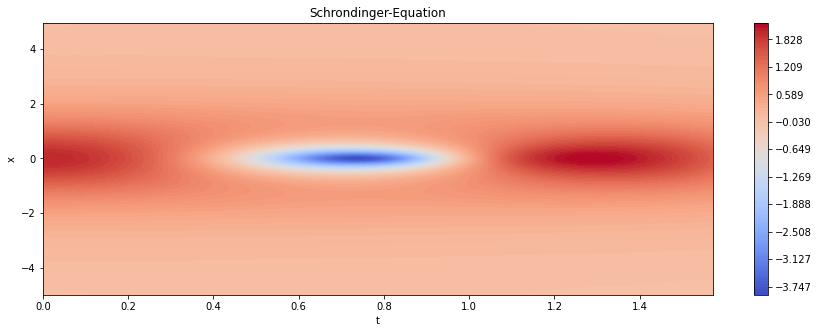

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u1 = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u1), np.max(u1), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Schrondinger-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [14]:
# true solution
h_true = np.abs(u1)
h_true = h_true.T
print(h_true.shape)

# exact
u_test_full = h_true[161:201, :]
print(u_test_full.shape)

# with torch.no_grad():
#     prediction = lem(test_tensor)

# prediction.shape


k1 = (prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
prediction_tensor.shape

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")







(201, 256)
(40, 256)
Relative Error Test:  0.021859621931236514 %


In [15]:
### Max error

R_abs = torch.max(prediction_tensor-u_test_full)
print(R_abs)




tensor(0.4347, dtype=torch.float64)


In [16]:
### Explained variance score

import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())





Explained Variance Score: 0.9619622187208741


In [17]:
### Mean absolute error

R_mean = torch.mean(torch.abs(prediction_tensor - u_test_full))
print(R_mean)

## t= 1.28, 1.5, 1.37


tensor(0.0756, dtype=torch.float64)


In [18]:
### snapshots

prediction_tensor = torch.squeeze(prediction_tensor)
h = np.abs(u)
h.shape


(201, 256)

(256, 1)
(256, 1)


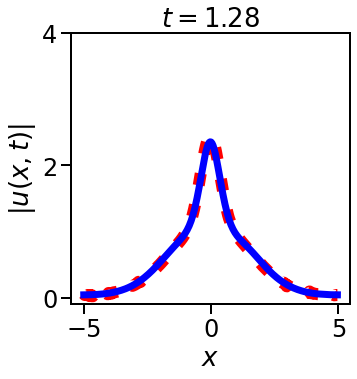

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-38, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[-38, :].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${|u(x, t)|}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.28}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('GRU_1.28_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()

(256, 1)
(256, 1)


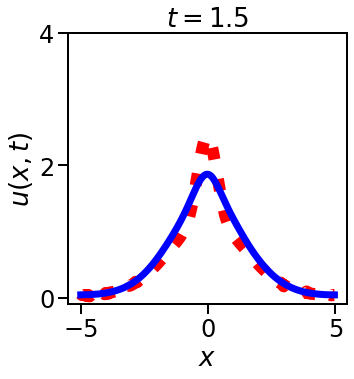

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)


final_time_output = prediction_tensor[-3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[-3, :].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${u(x, t)}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.5}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('GRU_1.5_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()



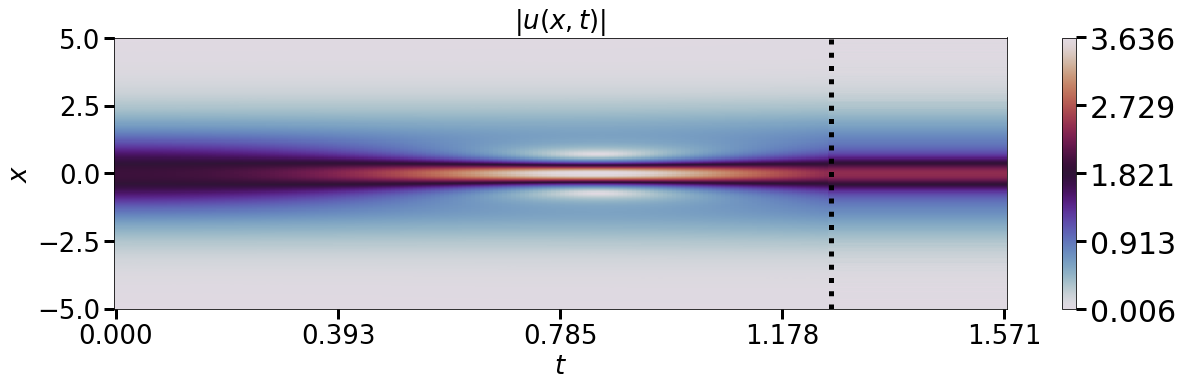

In [21]:
### 80-20 contour plot

conc_u = torch.squeeze(input_tensor)

concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

t1 = np.linspace(0, 1.5707 , 200)

import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-5, 5, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1.57, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$|u(x, t)|$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=1.26449, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_GRU_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
